## Completeness plots
[You can use these cells to explain what's going on in the cells below!] <\br>
This jn is intended to determine the completeness on the detections of <\br>
Gawa code. A positional match between the simulated data and the detections <\br>
is done, even a primary match has been done at first.

First of all, import the packages:

In [32]:
from matplotlib import pyplot as plt
import numpy as np
import astropy 
import astropy.units as u
from astropy.coordinates import SkyCoord
import warnings
warnings.filterwarnings("ignore")

Simulated data is read (pixel with nside = 64, absolute magnitude, signal to noise ratio, </br>
Galactic coordinates l and b, equatorial coordinates right ascension and declination, </br>
exponential radius in parsecs, ellipticity, positional angle in degrees, mass for stars </br>
greater than limiting magnitude +1, and distance in parsecs).

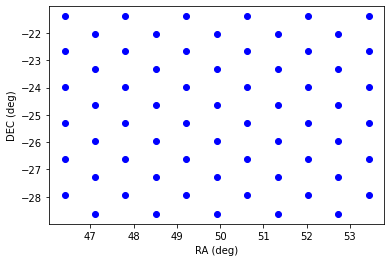

In [33]:
ipix, Nstar, M_V, SNR, L, B, RA_pix, DEC_pix, r_exp_pc, ell, pa, mass, dist = \
np.loadtxt('simulated.txt', unpack=True)

mM_sim = 5. * np.log10(dist) - 5.

plt.scatter(RA_pix, DEC_pix, c='b')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.show()

Similar data from detections. While the coordinates of the simulated data are <\br>
the centers of the ipixels with nside = 64, the positions of the detections are free.

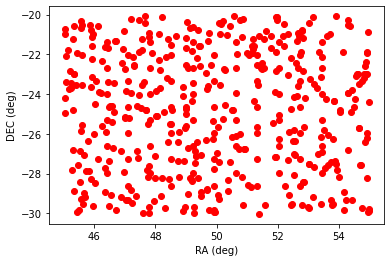

In [34]:
N_det, RA_det, DEC_det, wrad, DistDet_kpc, m_M_det, SNR_det, wave_peak, \
Dist2object_arcmin, hlr_times_3_arcmin, SNR_rank, \
Wave_r3, DistSimulation_kpc, m_M_simulation, M_m_Det_minus_Sim, \
SNR_est = np.loadtxt('detected.txt', usecols=(0,1,2,3,4,5,6,7,9,10,12,13,14,16,17,18), unpack=True)

plt.scatter(RA_det, DEC_det, c='r')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.show()

Now, reading integer data from detections and after, the strings (avoiding do that in the same line).

In [35]:
N, HPX64, N0_order = np.loadtxt('detected.txt', usecols=(0,15,19), dtype=int, unpack=True)
Name, Class = np.loadtxt('detected.txt', usecols=(8,11), dtype=str, unpack=True)

### Positional match between simulations and detections

Bear in mind that the half-light radii (effective radii) here is the radii that encompasses </br>
half of the total number of stars, since there are no segregation in the cluster. It corresponds </br>
to 1.7 times the exponential radii. This radii in parsec is converted to radii in degrees, and a </br>
minimum angular distance is used to determine if a simulated cluster is matched to the detections. </br>

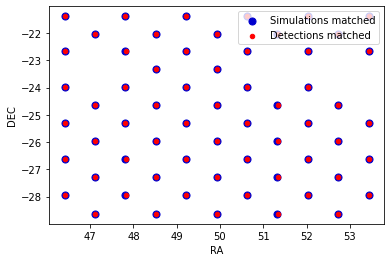

Total number of matches between simulations and detections is 62 using 1.0 half-light radii.


In [36]:
n_rh = 1.

r_hl_pc = 1.7 * r_exp_pc
r_deg = (180. / np.pi) * np.arctan(n_rh * r_hl_pc / dist)
coord_sim = SkyCoord(ra=RA_pix*u.degree, dec=DEC_pix*u.degree)
coord_det = SkyCoord(ra=RA_det*u.degree, dec=DEC_det*u.degree)
max_sep = r_deg * u.degree
idx, d2d, d3d = coord_sim.match_to_catalog_3d(coord_det)
sep_constraint = d2d < max_sep
idx_sim = np.where(d2d < max_sep)[0]
sim_matches = coord_sim[sep_constraint]
idx = idx[sep_constraint]
det_matches = coord_det[idx]

plt.scatter(sim_matches.ra.deg, sim_matches.dec.deg, c="mediumblue", s = 50, label='Simulations matched')
plt.scatter(det_matches.ra.deg, det_matches.dec.deg, c="r", s= 20, label='Detections matched')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend()
plt.show()

print('Total number of matches between simulations and detections is ' + str(len(sim_matches)) + \
      ' using ' + str(n_rh) + ' half-light radii.')

Here we can see that the match is done using index idx:

In [37]:
print('------------------------------------------------------------------')
print('| RA_simul  | DEC_simul  | RA_detect | DEC_detect | sep(arcmin) |')
print('------------------------------------------------------------------')
for i,j in enumerate(idx):
    print("| {:.6f} | {:.6f} | {:.6f} | {:.6f} | {:.8f}  |".format(RA_pix[idx_sim[i]], \
                                                         DEC_pix[idx_sim[i]], \
                                                         RA_det[j], DEC_det[j], 60.*d2d[j].deg))
print('------------------------------------------------------------------')

------------------------------------------------------------------
| RA_simul  | DEC_simul  | RA_detect | DEC_detect | sep(arcmin) |
------------------------------------------------------------------
| 52.734400 | -28.631000 | 52.735500 | -28.632700 | 0.26969717  |
| 53.437500 | -27.953200 | 53.441600 | -27.954700 | 0.31660742  |
| 48.515600 | -28.631000 | 48.520000 | -28.633300 | 0.11169586  |
| 47.109400 | -28.631000 | 47.110100 | -28.632300 | 0.07052856  |
| 47.812500 | -27.953200 | 47.815400 | -27.953300 | 0.15487924  |
| 51.328100 | -28.631000 | 51.330400 | -28.632200 | 0.10074582  |
| 49.921900 | -28.631000 | 49.925400 | -28.632700 | 0.15076257  |
| 50.625000 | -27.953200 | 50.625400 | -27.953600 | 0.34176631  |
| 52.031200 | -27.953200 | 52.035900 | -27.957100 | 0.09404117  |
| 52.734400 | -27.279600 | 52.737300 | -27.282700 | 0.23103866  |
| 51.328100 | -27.279600 | 51.330800 | -27.282200 | 0.15092665  |
| 52.031200 | -26.610100 | 52.032200 | -26.611200 | 0.22936012  |
| 49.218

## Creating a function
Here we created a function to avoid repeat many times the same plots.

In [38]:
def plot_comp(arg, idxs, label, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    A = ax1.hist(arg[idxs], bins=20, range=(np.min(arg), np.max(arg)), histtype='step', \
                 color = "r", label='Detections')
    B = ax1.hist(arg, bins=20, range=(np.min(arg), np.max(arg)), histtype='step', \
                 color = "mediumblue", label='Simulated clusters')
    completeness = A[0] / B[0]
    ax1.set_xlabel(label)
    ax1.set_ylabel( '# Detected Clusters')
    ax1.legend()

    #PARA COMPLETEZA DA DISTANCIA KPC
    plt.step(A[1][0:-1], np.nan_to_num(completeness), ':r', label='NaN=0.')
    ax2.step(A[1][0:-1],completeness, label='Data', color='k')
    ax2.set_xlabel(label)
    ax2.set_ylabel('Completeness')
    ax2.set_ylim([0,1.1])
    ax2.legend()
    fig.suptitle(title)
    plt.show()

## Absolute magnitude in V band

The absolute magnitude is read from the simulated data, since in the </br>
detections the absolute magnitude in V band is not calculated.

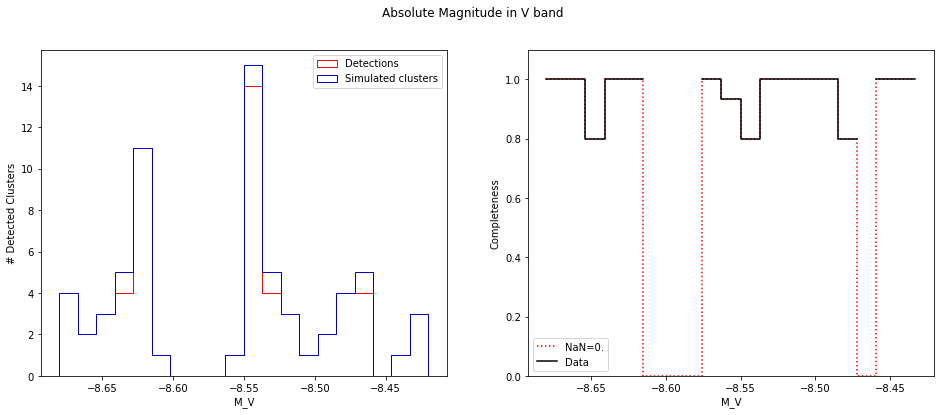

In [39]:
plot_comp(M_V, idx_sim, 'M_V', 'Absolute Magnitude in V band')

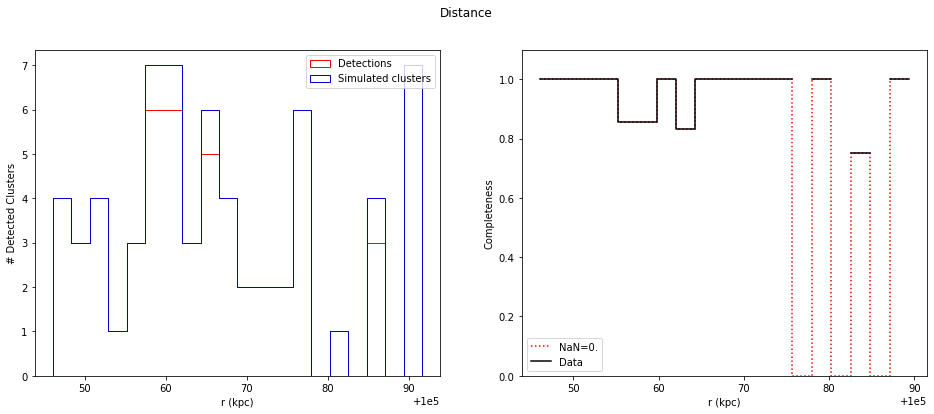

In [40]:
plot_comp(dist, idx_sim, 'r (kpc)', 'Distance')

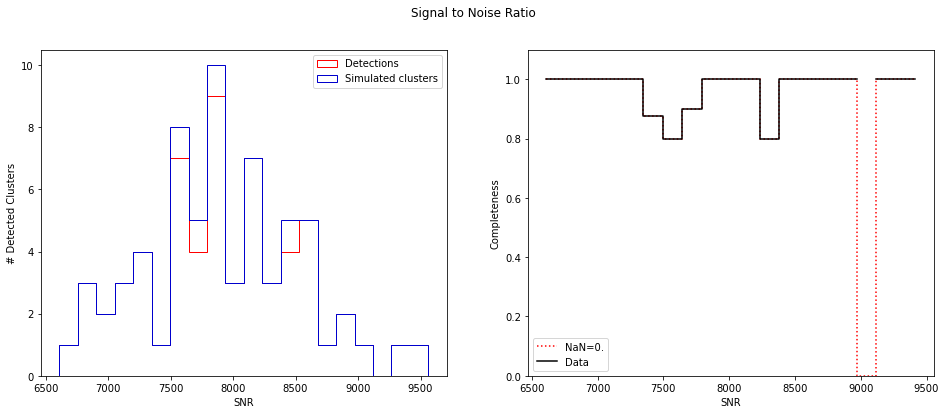

In [41]:
plot_comp(SNR, idx_sim, 'SNR', 'Signal to Noise Ratio')

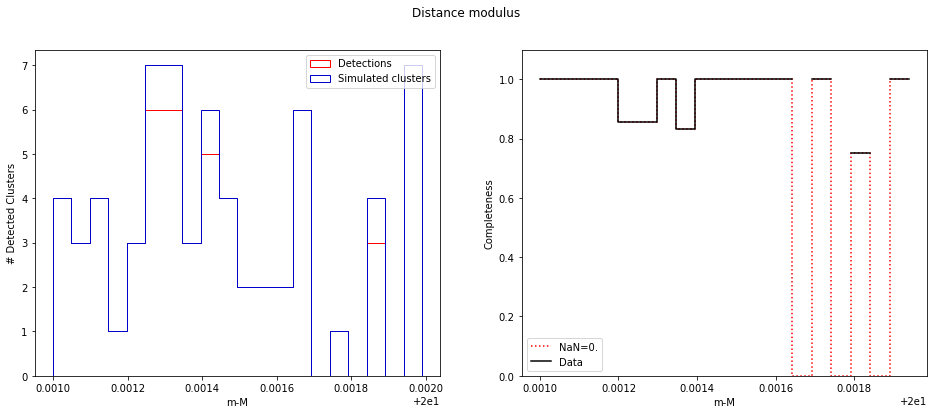

In [42]:
plot_comp(mM_sim, idx_sim, 'm-M', 'Distance modulus')

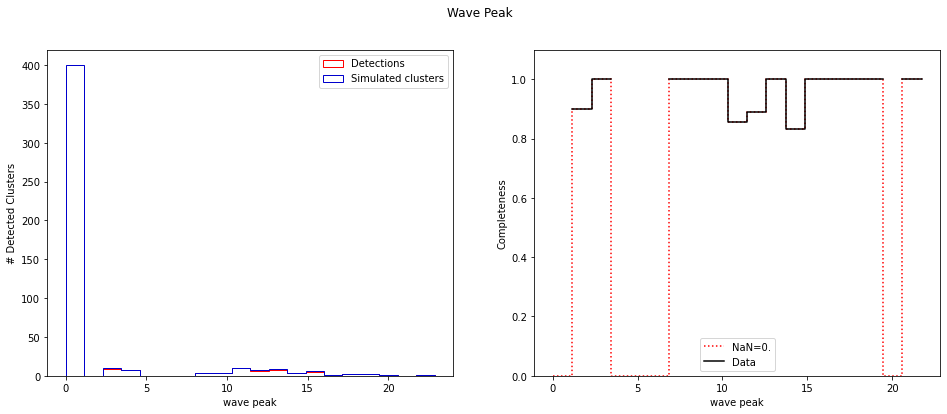

In [43]:
plot_comp(wave_peak, idx_sim, 'wave peak', 'Wave Peak')

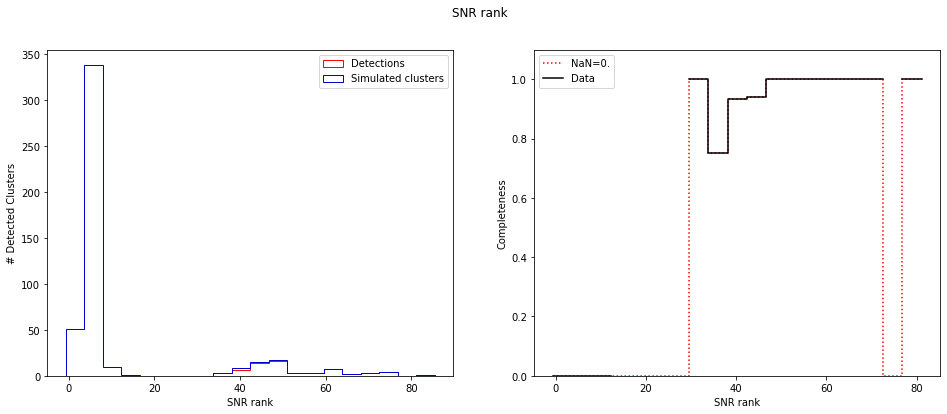

In [44]:
plot_comp(SNR_rank, idx_sim, 'SNR rank', 'SNR rank')

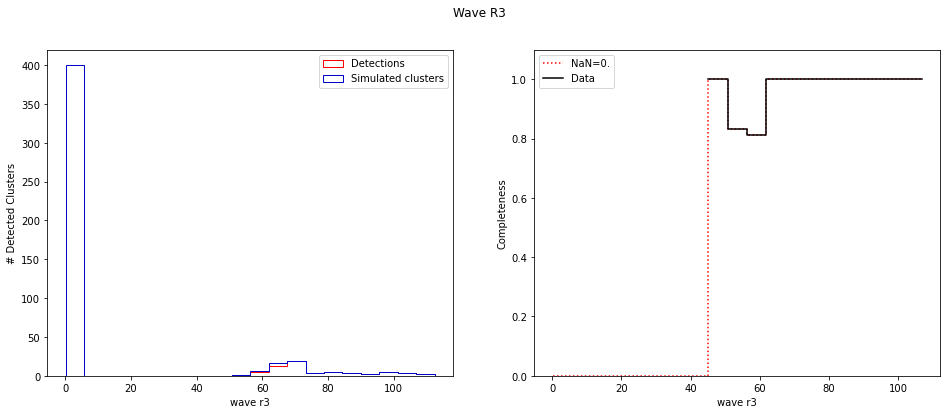

In [45]:
plot_comp(Wave_r3, idx_sim, 'wave r3', 'Wave R3')

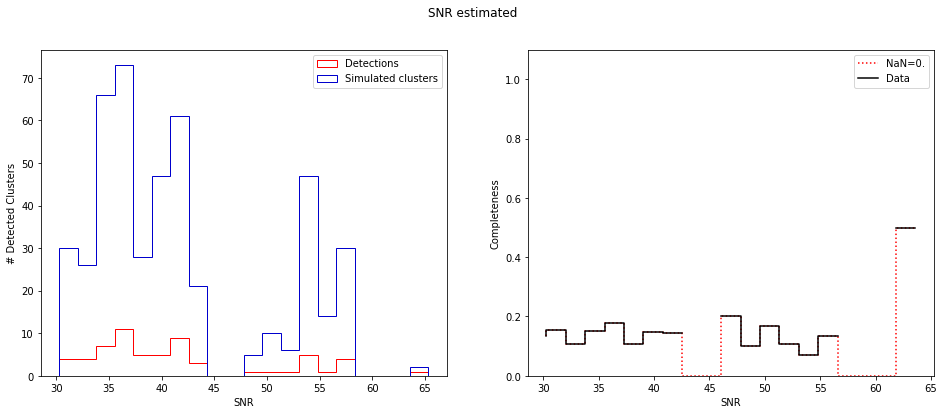

In [46]:
plot_comp(SNR_est, idx_sim, 'SNR', 'SNR estimated')